In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [24]:
X = [[[(10**i)+j] for i in range (5)] for j in range(100)]
print (X)
Y = [(24+i) for i in range(100)]
print (Y)


[[[1], [10], [100], [1000], [10000]], [[2], [11], [101], [1001], [10001]], [[3], [12], [102], [1002], [10002]], [[4], [13], [103], [1003], [10003]], [[5], [14], [104], [1004], [10004]], [[6], [15], [105], [1005], [10005]], [[7], [16], [106], [1006], [10006]], [[8], [17], [107], [1007], [10007]], [[9], [18], [108], [1008], [10008]], [[10], [19], [109], [1009], [10009]], [[11], [20], [110], [1010], [10010]], [[12], [21], [111], [1011], [10011]], [[13], [22], [112], [1012], [10012]], [[14], [23], [113], [1013], [10013]], [[15], [24], [114], [1014], [10014]], [[16], [25], [115], [1015], [10015]], [[17], [26], [116], [1016], [10016]], [[18], [27], [117], [1017], [10017]], [[19], [28], [118], [1018], [10018]], [[20], [29], [119], [1019], [10019]], [[21], [30], [120], [1020], [10020]], [[22], [31], [121], [1021], [10021]], [[23], [32], [122], [1022], [10022]], [[24], [33], [123], [1023], [10023]], [[25], [34], [124], [1024], [10024]], [[26], [35], [125], [1025], [10025]], [[27], [36], [126], 

In [0]:
X = np.array(X, dtype="float32")
Y = np.array(Y, dtype="float32")


In [0]:
X /= 500
Y /= 500

In [27]:
X.shape

(100, 5, 1)

In [28]:
Y.shape

(100,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, 
                                                random_state=5)

In [30]:
X_train


array([[[1.9000e-01],
        [2.0800e-01],
        [3.8800e-01],
        [2.1880e+00],
        [2.0188e+01]],

       [[1.1400e-01],
        [1.3200e-01],
        [3.1200e-01],
        [2.1120e+00],
        [2.0112e+01]],

       [[4.6000e-02],
        [6.4000e-02],
        [2.4400e-01],
        [2.0440e+00],
        [2.0044e+01]],

       [[8.0000e-02],
        [9.8000e-02],
        [2.7800e-01],
        [2.0780e+00],
        [2.0078e+01]],

       [[5.0000e-02],
        [6.8000e-02],
        [2.4800e-01],
        [2.0480e+00],
        [2.0048e+01]],

       [[2.8000e-02],
        [4.6000e-02],
        [2.2600e-01],
        [2.0260e+00],
        [2.0026e+01]],

       [[1.2800e-01],
        [1.4600e-01],
        [3.2600e-01],
        [2.1260e+00],
        [2.0126e+01]],

       [[1.4400e-01],
        [1.6200e-01],
        [3.4200e-01],
        [2.1420e+00],
        [2.0142e+01]],

       [[1.1200e-01],
        [1.3000e-01],
        [3.1000e-01],
        [2.1100e+00],
        [2.0110e

In [31]:
from keras.layers import SimpleRNN,LSTM
model = Sequential()
model.add(LSTM((2),input_shape=(5,1),return_sequences=True))
model.add(LSTM((3),input_shape=(5,1),return_sequences=True))
model.add(Flatten())
model.add(Dense(1,activation='relu'))
#model.compile(optimizer='adam',loss='mae',metrics=['acc'])
model.compile(optimizer='adam',loss='mae',metrics=['acc'])

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5, 2)              32        
_________________________________________________________________
lstm_6 (LSTM)                (None, 5, 3)              72        
_________________________________________________________________
flatten_2 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 80 samples, validate on 20 samples
Epoch 1/1000





80/80 [==============================] - 2s 29ms/step - loss: 0.1356 - acc: 0.0000e+00 - val_loss: 0.1170 - val_acc: 0.0000e+00
Epoch 2/1000
80/80 [==============================] - 0s 282us/step - loss: 0.1315 - acc: 0.0000e+00 - val_loss: 0.1128 - val_acc: 0.0000e+00
Epoch 3/1000
80/80 [==============================] - 0s 262us/step - loss: 0.1273 - acc: 0.0000e+00 - val_loss: 0.1086 - val_acc: 0.0000e+00
Epoch 4/1000
80/80 [==============================] - 0s 288us/step - loss: 0.1230 - acc: 0.0000e+00 - val_loss: 0.1042 - val_acc: 0.0000e+00
Epoch 5/1000
80/80 [==============================] - 0s 309us/step - loss: 0.1185 - acc: 0.0000e+00 - val_loss: 0.0996 - val_acc: 0.0000e+00
Epoch 6/1000
80/80 [==============================] - 0s 273us/step - loss: 0.1140 - acc: 0.0000e+00 - val_loss: 0.0950 - val_acc: 0.0000e+00
Epo

In [0]:
y_predict = model.predict(X_test)

In [0]:
np.round(y_predict*500)

array([[[0., 0., 0.],
        [1., 0., 1.],
        [1., 1., 1.],
        [2., 1., 2.],
        [2., 1., 3.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 1., 1.],
        [1., 1., 2.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [1., 0., 1.],
        [1., 1., 2.],
        [2., 1., 2.],
        [2., 1., 3.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.],
        [1., 0., 1.],
        [1., 0., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.],
        [1., 0.,

In [0]:
np.round(y_test*500)

array([ 98.,  64.,  78.,  60., 106.,  55.,  42.,  52.,  49.,  67., 129.,
        69., 102.,  72.,  92.,  66.,  74.,  89.,  44., 101.],
      dtype=float32)

ValueError: ignored

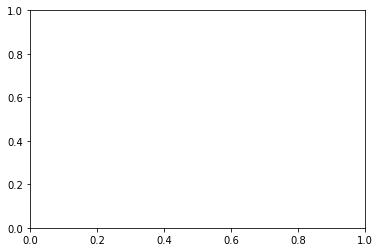

In [0]:
plt.scatter(range(20),y_predict,c = 'r')
plt.scatter(range(20),y_test ,c='g')
plt.show()

In [0]:
plt.plot(hist.history['loss'])
plt.show()

NameError: ignored